In [1]:
import json
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
os.listdir('./')

['.ipynb_checkpoints',
 'CNN_classifier.ipynb',
 'data.csv',
 'Data_exploration.ipynb',
 'holdout_set.docx',
 'holdout_set.txt',
 'images',
 'labels.csv',
 'module_metadata.json',
 'SVC_classifier.ipynb']

In [3]:
with open("./module_metadata.json", "r") as read_file:
    data = json.load(read_file)

In [4]:
data_df = pd.DataFrame(data)
data_df

,13357,13356,19719,11542,11543,11540,11541,11546,11547,11544,...,8483,8484,8485,8486,8487,8488,8489,7464,18065,13354
image_filepath,images/13357.jpg,images/13356.jpg,images/19719.jpg,images/11542.jpg,images/11543.jpg,images/11540.jpg,images/11541.jpg,images/11546.jpg,images/11547.jpg,images/11544.jpg,...,images/8483.jpg,images/8484.jpg,images/8485.jpg,images/8486.jpg,images/8487.jpg,images/8488.jpg,images/8489.jpg,images/7464.jpg,images/18065.jpg,images/13354.jpg
anomaly_class,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,No-Anomaly,...,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Vegetation,Cracking,No-Anomaly,No-Anomaly


In [5]:
print("Unique Label :", data_df.loc['anomaly_class'].unique())
print("Total number of classes:",len(data_df.loc['anomaly_class'].unique()))

Unique Label : ['No-Anomaly' 'Cell' 'Hot-Spot' 'Offline-Module' 'Vegetation' 'Diode'
 'Shadowing' 'Cracking' 'Diode-Multi' 'Soiling' 'Cell-Multi'
 'Hot-Spot-Multi']
Total number of classes: 12


In [6]:
data_df.loc['anomaly_class'].value_counts(normalize = True)*100

No-Anomaly        50.097975
Cell               9.370447
Vegetation         8.229915
Diode              7.526504
Cell-Multi         6.421143
Shadowing          5.300708
Cracking           4.647541
Offline-Module     4.130031
Hot-Spot-Multi     1.200824
Hot-Spot           1.200824
Soiling            1.004874
Diode-Multi        0.869216
Name: anomaly_class, dtype: float64

Text(0.5, 1.0, 'Vegetation')

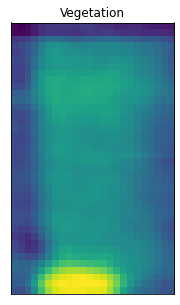

In [7]:
#plot a sample image
plt.figure(figsize=(5,5))
plt.imshow(np.uint8(img.imread('./'+'images/8484.jpg')))
plt.xticks([]),plt.yticks([])
plt.title('Vegetation')

In [8]:
## Check dimension of a random image
img.imread('./'+'images/8484.jpg').shape

(40, 24)

Text(0, 0.5, 'Frequency')

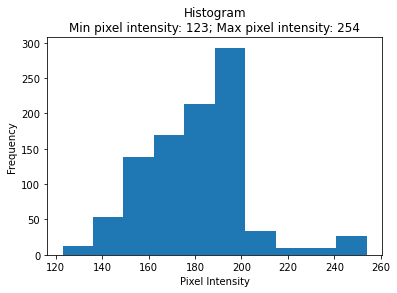

In [9]:
arr = img.imread('./'+'images/8484.jpg').flatten()
plt.hist(arr)
plt.title('Histogram\nMin pixel intensity: {}; Max pixel intensity: {}'.format(arr.min(),arr.max()))
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

In [10]:
data_df[data_df.columns.tolist()[0]]['image_filepath']

'images/13357.jpg'

In [11]:
def image_check(data = None):
    
    height = []
    width = []
    
    image_list = ['./'+i for i in data.loc['image_filepath'].tolist()]
    
    for i in image_list:
        temp = img.imread(i).shape
        
        height.append(temp[0])
        width.append(temp[1])
    
    print("Mean Height: {:.2f} & Mean Width: {:.2f} for {:d} images".format(np.mean(height), np.mean(width), len(height)))
    
    return None

In [12]:
image_check(data = data_df)

Mean Height: 40.00 & Mean Width: 24.00 for 19903 images


In [13]:
def plot_class(data = None):
    
    unique_class = data.loc['anomaly_class'].unique()
    plt.figure(figsize=(10,10))
    plt.tight_layout()
    j=1
    for i in unique_class:
        print("(*) Randomly selecting an image from class:",i)
        
        image_list = [(idx,value) for idx, value in enumerate(data.loc['anomaly_class']) if value==i]
        
        random_selection = random.choice(image_list)
        
        image_path = data.loc['image_filepath'].tolist()[random_selection[0]]
        
        image_read = img.imread(image_path)
        
        plt.subplot(4,3,j)
        j+=1
        plt.subplots_adjust(hspace = 1 , wspace = 1)
        plt.title('Class: {}'.format(i))
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
        plt.imshow(np.uint8(image_read))
        
    return None

In [19]:
image_list = [(idx,value) for idx, value in enumerate(data_df.loc['anomaly_class']) if value=='Diode-Multi']
random.choice(image_list)

(11866, 'Diode-Multi')

In [15]:
data_df.loc['image_filepath'].tolist()[14078]

'images/5239.jpg'

In [16]:
data_df['5239']

image_filepath    images/5239.jpg
anomaly_class                Cell
Name: 5239, dtype: object

(*) Randomly selecting an image from class: No-Anomaly
(*) Randomly selecting an image from class: Cell
(*) Randomly selecting an image from class: Hot-Spot
(*) Randomly selecting an image from class: Offline-Module
(*) Randomly selecting an image from class: Vegetation
(*) Randomly selecting an image from class: Diode
(*) Randomly selecting an image from class: Shadowing
(*) Randomly selecting an image from class: Cracking
(*) Randomly selecting an image from class: Diode-Multi
(*) Randomly selecting an image from class: Soiling
(*) Randomly selecting an image from class: Cell-Multi
(*) Randomly selecting an image from class: Hot-Spot-Multi


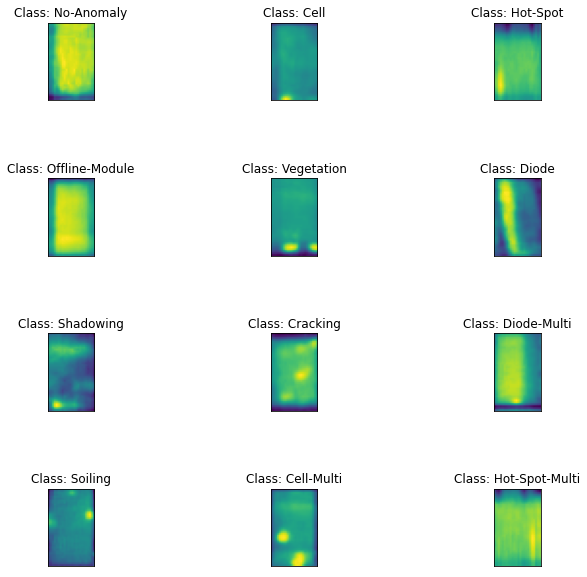

In [20]:
plot_class(data = data_df)